In [206]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [207]:
all_divisions = {
    "Premier Main": 472,
    "2": 473,
    "3": 474,
    "4": 475,
    "5": 476,
    "6": 477,
    "7": 478,
    "8A": 479,
    "8B": 480,
    "9": 481,
    "10": 482,
    "11": 483,
    "12": 484,
    "13A": 485,
    "13B": 486,
    "13C": 487,
    "14": 488,
    "15A": 489,
    "15B": 490,
    "Premier Masters": 491,
    "M2": 492,
    "M3": 493,
    "M4": 494,
    "Premier Ladies": 495,
    "L2": 496,
    "L3": 497,
    "L4": 498,
    }

In [208]:
# Legacy division identifiers for 2024-2025 season
all_divisions_2024 = {
    "Premier Main": 424,
    "2": 425,
    "3": 426,
    "4": 427,
    "5": 428,
    "6": 429,
    "7A": 430,
    "7B": 431,
    "8A": 432,
    "8B": 433,
    "9": 434,
    "10": 435,
    "11": 436,
    "12": 437,
    "13A": 438,
    "13B": 439,
    "14": 440,
    "15A": 441,
    "15B": 442,
    "Premier Masters": 443,
    "M2": 444,
    "M3": 445,
    "M4": 446,
    "Premier Ladies": 447,
    "L2": 448,
    "L3": 449,
    "L4": 450,
}

In [209]:
base_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons"

### Load Summary data

In [210]:
# Load all seasons summary data
summary_df_list = []
for season_folder in os.listdir(base_directory):
    # Skip 2024-2025 here because that season uses the legacy division layout
    if season_folder == "2024-2025":
        continue
    season_folder_path = os.path.join(base_directory, season_folder)
    if not os.path.isdir(season_folder_path):
        continue
    ranking_df_folder = os.path.join(season_folder_path, "summary_df")
    if not os.path.isdir(ranking_df_folder):
        continue
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("summary_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Add Rank column to the dataframe
        df["Rank"] = df.index + 1
        summary_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_summary_df = pd.concat(summary_df_list, ignore_index=True)

In [211]:
# Load summary_dfs for 2025-2026 season

summary_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\2025-2026\summary_df"

summary_dfs = []
for division in all_divisions.keys():
    for week in range(25, 0, -1):
        try:
            summary_df = pd.read_csv(f"{summary_directory}\\week_{week}\\{division}_summary_df.csv")
            summary_df["Division"] = division
            # Create Rank column based on Points column
            summary_df["Rank"] = summary_df.index + 1
            # Add Season column to the dataframe
            summary_df["Season"] = "2025-2026"
            summary_dfs.append(summary_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
summary_df_2025_2026 = pd.concat(summary_dfs)

In [212]:
# Load summary_dfs for 2024-2025 season using legacy divisions
summary_directory_2024 = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons\2024-2025\summary_df"

summary_dfs_2024 = []
for division in all_divisions_2024.keys():
    for week in range(25, 0, -1):
        try:
            summary_df = pd.read_csv(f"{summary_directory_2024}\\week_{week}\\{division}_summary_df.csv")
            summary_df["Division"] = division
            summary_df["Rank"] = summary_df.index + 1
            summary_df["Season"] = "2024-2025"
            summary_dfs_2024.append(summary_df)
            break
        except FileNotFoundError:
            continue

if summary_dfs_2024:
    summary_df_2024_2025 = pd.concat(summary_dfs_2024)
else:
    summary_df_2024_2025 = pd.DataFrame()

In [213]:
# Concatenate the summary dataframes from all seasons
big_summary_df = pd.concat([all_previous_summary_df, summary_df_2024_2025, summary_df_2025_2026], ignore_index=True)

# Drop rows where Played is equal to zero
big_summary_df = big_summary_df[big_summary_df["Played"] != 0]

### Load Ranking data

In [214]:
# 2025-2026 ranking_df directory
ranking_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2025-2026\ranking_df"

In [215]:
# In the the summary directory are week_x folders (eg week_4). First check the most recent folder (ie the highest number), then check the next highest, etc, 
# using the all_divisions dictionary to make sure we load every division's most recent summary file and avoid loading an older file for a division that has a more recent file.

ranking_dfs = []
for division in all_divisions.keys():
    for week in range(25, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2025-2026"
            ranking_dfs.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
ranking_df_2025_2026 = pd.concat(ranking_dfs)

In [216]:
# Load 2024-2025 ranking data
ranking_df_dir_2024 = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons\2024-2025\ranking_df"

ranking_dfs_2024 = []
for division in all_divisions_2024.keys():
    for week in range(25, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir_2024}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2024-2025"
            ranking_dfs_2024.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the 2024-2025 ranking dataframes into one
ranking_df_2024_2025 = pd.concat(ranking_dfs_2024)

In [217]:
# In the base directory are seasons folders (eg. 2019-2020, 2020-2021, etc.). We want to go through each season folder, go into the ranking_df folder for that season, 
# and read in all the ranking_df files (determined by whether the file ends in ranking_df) into a list of dataframes. We will then concatenate all the dataframes into one big dataframe.
# Add a Season column to the dataframe to keep track of which season the data is from.

ranking_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "ranking_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("ranking_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        df["Season"] = season_folder
        ranking_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_ranking_df = pd.concat(ranking_df_list)

# Concatenate all seasons including 2024-2025 and 2025-2026
final_ranking_df = pd.concat([big_ranking_df, ranking_df_2024_2025, ranking_df_2025_2026])

### Load Schedules data

In [218]:
# Load all seasons schedule data
schedules_df_list = []
for season_folder in os.listdir(base_directory):
    if season_folder == "2024-2025":
        continue
    season_folder_path = os.path.join(base_directory, season_folder)
    if not os.path.isdir(season_folder_path):
        continue
    ranking_df_folder = os.path.join(season_folder_path, "schedules_df")
    if not os.path.isdir(ranking_df_folder):
        continue
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("schedules_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder

        schedules_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_schedules_df = pd.concat(schedules_df_list, ignore_index=True)

In [219]:
# 2025-2026 schedules_df directory
schedules_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2025-2026\schedules_df"

In [220]:
# 2024-2025 schedules_df directory
schedules_df_dir_2024 = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons\2024-2025\schedules_df"

In [221]:
schedules_dfs = []
for division in all_divisions.keys():
    for week in range(25, 0, -1):
        try:
            schedules_df = pd.read_csv(f"{schedules_df_dir}\\week_{week}\\{division}_schedules_df.csv")
            schedules_df["Season"] = "2025-2026"
            schedules_df["Division"] = division
            schedules_dfs.append(schedules_df)
            break
        except FileNotFoundError:
            continue

if schedules_dfs:
    schedules_df_2025_2026 = pd.concat(schedules_dfs)
else:
    schedules_df_2025_2026 = pd.DataFrame()

# Load 2024-2025 schedules data using legacy divisions
schedules_dfs_2024 = []
for division in all_divisions_2024.keys():
    for week in range(25, 0, -1):
        try:
            schedules_df = pd.read_csv(f"{schedules_df_dir_2024}\\week_{week}\\{division}_schedules_df.csv")
            schedules_df["Season"] = "2024-2025"
            schedules_df["Division"] = division
            schedules_dfs_2024.append(schedules_df)
            break
        except FileNotFoundError:
            continue

if schedules_dfs_2024:
    schedules_df_2024_2025 = pd.concat(schedules_dfs_2024)
else:
    schedules_df_2024_2025 = pd.DataFrame()

# Concatenate the schedules dataframes from all seasons
schedules_to_concat = [all_previous_schedules_df]
if not schedules_df_2024_2025.empty:
    schedules_to_concat.append(schedules_df_2024_2025)
if not schedules_df_2025_2026.empty:
    schedules_to_concat.append(schedules_df_2025_2026)
all_schedules_df = pd.concat(schedules_to_concat, ignore_index=True)

In [222]:
# Tidy Venue column
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Cornwall Street (CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (CSPSC - M)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (M - CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - HK Squash Centre", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (M - HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Football Club (HKFC)", "Hong Kong Football Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Cricket Club (HKCC)", "Hong Kong Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Kowloon Cricket Club (KCC)", "Kowloon Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("United Services Recreation Club (USRC)", "United Services Recreation Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Pei Ho Street (PHSSC)", "Pei Ho Street Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Java Road (JRSC)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Java Road (JRSC - M)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Harbour Road (HRSC)", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Harbour Road Sports Centre", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Ladies Recreation Club (LRC)", "Ladies Recreation Club")

In [223]:
all_schedules_df["Venue"].value_counts().head(20)

Venue
Cornwall Street Squash Centre             5823
HK Squash Centre                          3746
Hong Kong Football Club                   2637
Hong Kong Cricket Club                    1373
Kowloon Cricket Club                      1036
Kwun Chung (KCSC)                          513
United Services Recreation Club            496
Pei Ho Street Sports Centre                481
Harbour Road Sports Centre                 297
Ladies Recreation Club                     276
Java Road                                  166
HK CLUB                                    120
Yuen Long Jockey Club (YLJCSC)             118
Royal Hong Kong Yacht Club                 115
Royal Hong Kong Yacht Club (RHKYC)         110
Chinese University of HK (CUHK)            108
Yuen Long Jockey Club Squash Courts         97
Police Sports & Recreation Club (PSRC)      89
Kwun Chung Sports Centre                    86
Hong Kong Sports Institute (HKSI)           81
Name: count, dtype: int64

In [224]:
### Load Teams Data

# Load all seasons teams data
teams_df_list = []
for season_folder in os.listdir(base_directory):
    # Skip 2024-2025 here because that season uses the legacy division layout
    if season_folder == "2024-2025":
        continue
    season_folder_path = os.path.join(base_directory, season_folder)
    if not os.path.isdir(season_folder_path):
        continue
    teams_df_folder = os.path.join(season_folder_path, "teams_df")
    if not os.path.isdir(teams_df_folder):
        continue
    for file in os.listdir(teams_df_folder):
        if not file.endswith("teams_df.csv"):
            continue
        file_path = os.path.join(teams_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Append the dataframe to the list
        teams_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_teams_df = pd.concat(teams_df_list, ignore_index=True)

# Load 2024-2025 teams data using legacy divisions
teams_directory_2024 = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons\2024-2025\teams_df"

teams_dfs_2024 = []
if os.path.isdir(teams_directory_2024):
    for division in all_divisions_2024.keys():
        for week in range(25, 0, -1):
            try:
                teams_df = pd.read_csv(f"{teams_directory_2024}\\week_{week}\\{division}_teams_df.csv")
                teams_df["Division"] = division
                teams_df["Season"] = "2024-2025"
                teams_dfs_2024.append(teams_df)
                break
            except FileNotFoundError:
                continue

if teams_dfs_2024:
    teams_df_2024_2025 = pd.concat(teams_dfs_2024)
    all_previous_teams_df = pd.concat([all_previous_teams_df, teams_df_2024_2025], ignore_index=True)

In [225]:
all_previous_teams_df["Season"].unique()

array(['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2021-2022',
       '2022-2023', '2023-2024', '2024-2025'], dtype=object)

In [226]:
def parse_result(result):
    """
    Function to parse the 'result' string
    """
    overall, rubbers = result.split('(')
    rubbers = rubbers.strip(')').split(',')
    return overall, rubbers

### Create Results dataframe

In [227]:
# Drop unnecessary columns
all_schedules_df.drop(columns=['vs', 'Time'], inplace=True)

# Exclude rows where 'Away Team' is '[BYE]' (indicative of a bye week)
results_df = all_schedules_df[all_schedules_df['Away Team'] != '[BYE]'].copy()

# Replace NaN values in 'Result' with an empty string before applying str.contains
results_df['Result'] = results_df['Result'].fillna('')

# Keep rows where 'Result' contains brackets (indicative of a played match)
results_df = results_df[results_df['Result'].str.contains(r'\(')]

# Apply the function to the 'Result' column
results_df[['Overall Score', 'Rubbers']] = results_df['Result'].apply(lambda x: pd.Series(parse_result(x)))

# Splitting the 'Overall Score' into two separate columns
results_df[['Home Score', 'Away Score']] = results_df['Overall Score'].str.split('-', expand=True).astype(int)

# Get counts for CR and WO
results_df['CR'] = results_df['Rubbers'].apply(lambda x: x.count('CR'))
results_df['WO'] = results_df['Rubbers'].apply(lambda x: x.count('WO'))

# Create combined CR and WO column
results_df['CR_WO'] = results_df['CR'] + results_df['WO']

In [228]:
results_df["Season"].unique()

array(['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2021-2022',
       '2022-2023', '2023-2024', '2024-2025', '2025-2026'], dtype=object)

#### Create Results dataframe only for 5 player matches

In [229]:
# Filter out rows where Home Score and Away Score don't sum to 5
results_df_5 = results_df[results_df['Home Score'] + results_df['Away Score'] == 5]

In [230]:
# Include only rows where Venue equals 'Cornwall Street Squash Centre', 'HK Squash Centre', 
# 'Hong Kong Football Club', 'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club'.
venues = ['Cornwall Street Squash Centre', 'HK Squash Centre', 'Hong Kong Football Club', 
          'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club']
results_df_5 = results_df_5[results_df_5['Venue'].isin(venues)]

In [231]:
# Get average Home Score by Venue
results_df_5.groupby('Venue')['Home Score'].mean().sort_values(ascending=False)

Venue
Kowloon Cricket Club               3.318182
Hong Kong Football Club            2.989086
United Services Recreation Club    2.860759
Hong Kong Cricket Club             2.817391
Cornwall Street Squash Centre      2.623700
HK Squash Centre                   2.379468
Name: Home Score, dtype: float64

In [232]:
# Get mean of Home Score by Season
results_df_5.groupby('Season')['Home Score'].mean()

Season
2016-2017    2.660000
2017-2018    2.713142
2018-2019    2.731082
2019-2020    2.701635
2021-2022    2.586160
2022-2023    2.760300
2023-2024    2.661187
2024-2025    2.585059
2025-2026    2.603030
Name: Home Score, dtype: float64

In [233]:
# Count average instances of 'CR' and 'WO' in the 'Rubbers' column per match by Venue
results_df_5['CR'] = results_df_5['Rubbers'].apply(lambda x: x.count('CR'))
results_df_5['WO'] = results_df_5['Rubbers'].apply(lambda x: x.count('WO'))

results_df_5.groupby('Venue')[['CR', 'WO']].mean()

,CR,WO
Venue,,
Cornwall Street Squash Centre,0.285529,0.082756
HK Squash Centre,0.381369,0.127757
Hong Kong Cricket Club,0.188406,0.105797
Hong Kong Football Club,0.167121,0.050477
Kowloon Cricket Club,0.180251,0.042320
United Services Recreation Club,0.121519,0.050633


In [234]:
# Create 5 match rolling average for CR and WO by Match Week for results_df, 
results_df_5['CR Rolling Mean'] = results_df_5['CR'].transform(lambda x: x.rolling(5, 1).mean())
results_df_5['WO Rolling Mean'] = results_df_5['WO'].transform(lambda x: x.rolling(5, 1).mean())


In [235]:
match_week_count = results_df.groupby('Match Week')['Home Score'].count().reset_index()

In [236]:
cr_wo_data = results_df.groupby('Match Week')[['CR', 'WO']].mean().reset_index()

In [237]:
# Merge cr_wo_data with match_week_count
cr_wo_data = cr_wo_data.merge(match_week_count, on='Match Week', how='left')
cr_wo_data

,Match Week,CR,WO,Home Score
0,1,0.144408,0.047774,921
1,2,0.164718,0.049947,941
2,3,0.200213,0.051118,939
3,4,0.186766,0.070438,937
4,5,0.224118,0.051195,879
5,6,0.213536,0.061844,857
6,7,0.206980,0.093863,831
7,8,0.216970,0.072727,825
8,9,0.326456,0.104369,824
9,10,0.305998,0.089351,817


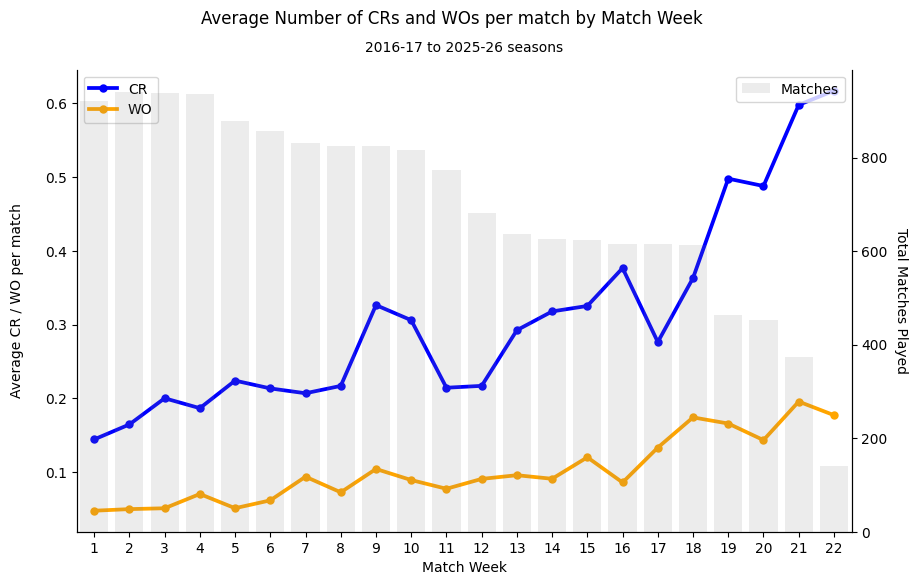

In [238]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(data=cr_wo_data, x='Match Week', y='CR', label='CR', errorbar=None, color='blue', markersize=4, alpha=1)
sns.pointplot(data=cr_wo_data, x='Match Week', y='WO', label='WO', errorbar=None, color='orange', markersize=4, alpha=1)

# Add axis to show count of matches per Match Week
ax2 = ax.twinx()
sns.barplot(data=cr_wo_data, x="Match Week", y='Home Score', label='Matches', color='grey', ax=ax2, alpha=0.15)
sns.despine(right=False)

plt.suptitle('Average Number of CRs and WOs per match by Match Week')
plt.title("2016-17 to 2025-26 seasons", size=10, y=1.02)

# Set the title of the left y-axis
ax.set_ylabel("Average CR / WO per match", rotation=90, labelpad=15)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [239]:
results_df.groupby("Match Week")["CR"].mean()

Match Week
1     0.144408
2     0.164718
3     0.200213
4     0.186766
5     0.224118
6     0.213536
7     0.206980
8     0.216970
9     0.326456
10    0.305998
11    0.214470
12    0.217009
13    0.292453
14    0.317891
15    0.325321
16    0.376623
17    0.276423
18    0.363192
19    0.497845
20    0.487859
21    0.597855
22    0.617021
Name: CR, dtype: float64

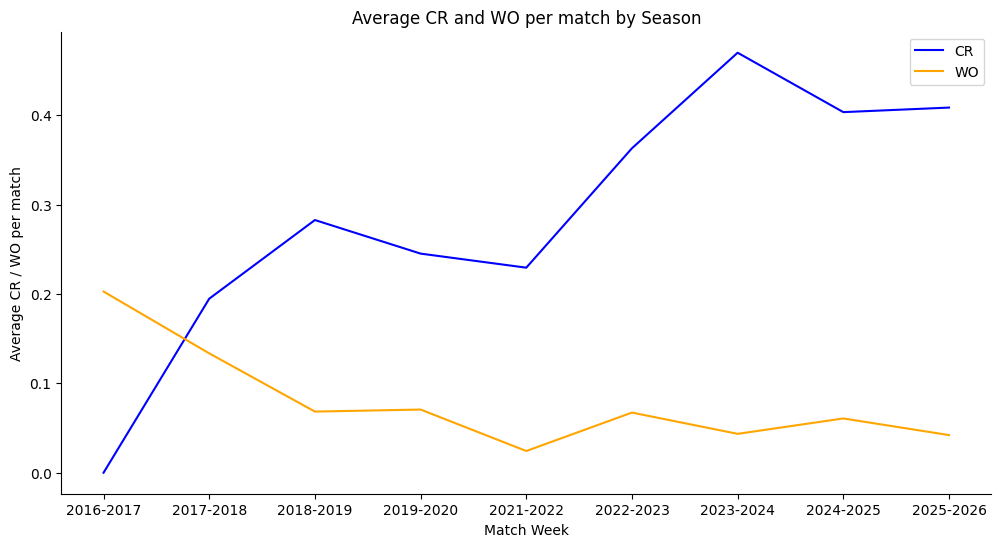

In [240]:
# Create graph to show average CR and WO per match by Season without confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='Season', y='CR', label='CR', errorbar=None, color='blue')
sns.lineplot(data=results_df, x='Season', y='WO', label='WO', errorbar=None, color='orange')
sns.despine()

plt.title('Average CR and WO per match by Season')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [241]:
results_df_2016 = results_df[results_df['Season'] == '2016-2017']
results_df_2017 = results_df[results_df['Season'] == '2017-2018']
results_df_2018 = results_df[results_df['Season'] == '2018-2019']
results_df_2022 = results_df[results_df['Season'] == '2022-2023']
results_df_2023 = results_df[results_df['Season'] == '2023-2024']
results_df_2024 = results_df[results_df['Season'] == '2024-2025']
results_df_2025 = results_df[results_df['Season'] == '2025-2026']

# Create 5 Match Week rolling average of CR_WO for each season while avoiding SettingWithCopyWarning
results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2018['CR_WO Rolling Mean'] = results_df_2018['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2022['CR_WO Rolling Mean'] = results_df_2022['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2023['CR_WO Rolling Mean'] = results_df_2023['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2024['CR_WO Rolling Mean'] = results_df_2024['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2025['CR_WO Rolling Mean'] = results_df_2025['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())

C:\Users\bpali\AppData\Local\Temp\ipykernel_11468\941460811.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_11468\941460811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_11468\941460811.py:12: S

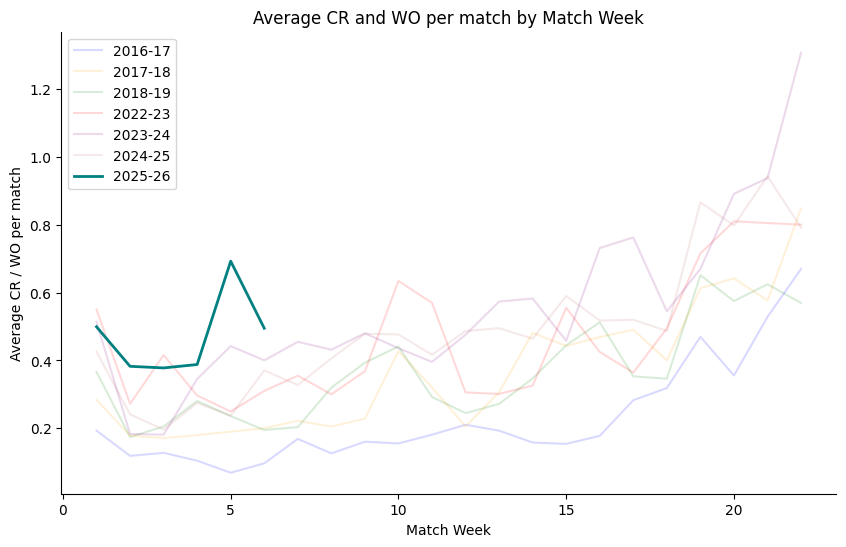

In [242]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
previous_alpha = 0.15
sns.lineplot(data=results_df_2016, x='Match Week', y='CR_WO Rolling Mean', label="2016-17", errorbar=None, color='blue', alpha=previous_alpha)
sns.lineplot(data=results_df_2017, x='Match Week', y='CR_WO Rolling Mean', label="2017-18", errorbar=None, color='orange', alpha=previous_alpha)
sns.lineplot(data=results_df_2018, x='Match Week', y='CR_WO Rolling Mean', label='2018-19', errorbar=None, color='green', alpha=previous_alpha)
sns.lineplot(data=results_df_2022, x='Match Week', y='CR_WO Rolling Mean', label='2022-23', errorbar=None, color='red', alpha=previous_alpha)
sns.lineplot(data=results_df_2023, x='Match Week', y='CR_WO Rolling Mean', label='2023-24', errorbar=None, color='purple', alpha=previous_alpha)
sns.lineplot(data=results_df_2024, x='Match Week', y='CR_WO Rolling Mean', label='2024-25', errorbar=None, color='brown', alpha=0.10)
# Make the 2025-26 line more prominent
sns.lineplot(data=results_df_2025, x='Match Week', y='CR_WO Rolling Mean', label='2025-26', errorbar=None, color='teal', alpha=1, linewidth=2)
sns.despine()

plt.title('Average CR and WO per match by Match Week')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.show()

In [243]:
# For results_df, group by 'Season', sum "CR_WO" and divide by the number of matches played in that season
results_df.groupby('Season')['CR_WO'].sum() / results_df.groupby('Season')['Match Week'].count()

Season
2016-2017    0.202656
2017-2018    0.328165
2018-2019    0.351015
2019-2020    0.315742
2021-2022    0.253644
2022-2023    0.430187
2023-2024    0.513256
2024-2025    0.464023
2025-2026    0.450526
dtype: float64

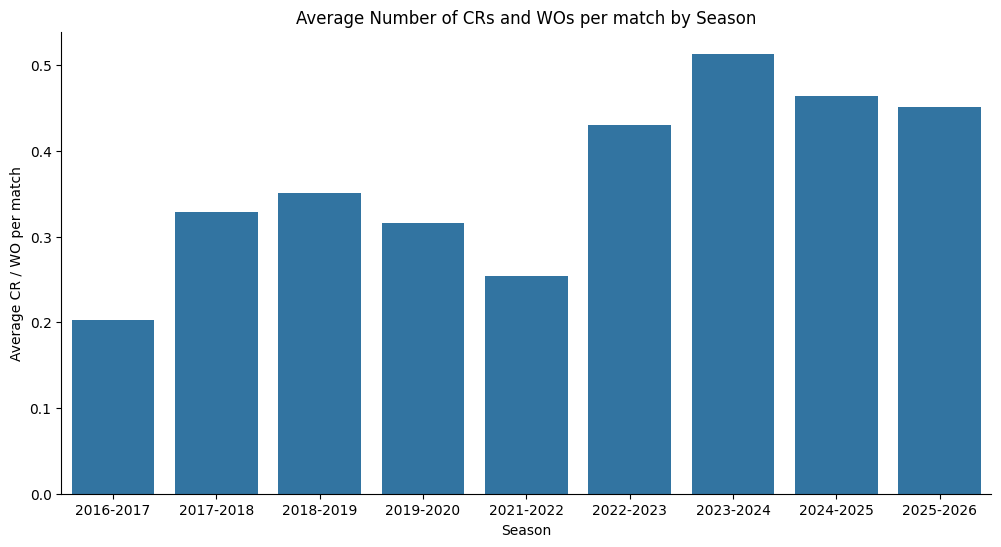

In [244]:
# Create chart of average number of CR_WO per match by Season
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Season', y='CR_WO', errorbar=None)
sns.despine()
plt.title('Average Number of CRs and WOs per match by Season')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Season')
plt.show()

In [245]:
results_df.groupby('Season')['CR_WO'].sum()

Season
2016-2017    473
2017-2018    762
2018-2019    847
2019-2020    353
2021-2022    261
2022-2023    761
2023-2024    968
2024-2025    948
2025-2026    214
Name: CR_WO, dtype: int64

In [246]:
# Show number of CR_WO by Division for results_df_2023
results_df_2023.groupby('Division')['CR_WO'].sum().sort_values(ascending=False)

Division
18     180
19     115
17A    113
16      78
7       62
12B     61
17B     60
13      53
12A     37
5       36
11      22
3       21
M3      18
2       17
4       15
L2      15
L3      14
L1      13
15      12
10       8
14       7
8        6
1        4
M2       1
M1       0
Name: CR_WO, dtype: int64

In [247]:
results_df_2023.groupby('Division')['CR_WO'].mean().sort_values(ascending=False)

Division
18     1.363636
17A    1.345238
12B    0.968254
17B    0.952381
19     0.871212
13     0.736111
16     0.590909
3      0.525000
5      0.500000
7      0.469697
12A    0.440476
L1     0.433333
2      0.425000
11     0.349206
L2     0.250000
M3     0.250000
4      0.250000
L3     0.222222
1      0.200000
10     0.111111
15     0.090909
8      0.083333
14     0.083333
M2     0.013889
M1     0.000000
Name: CR_WO, dtype: float64

In [248]:
# Count total number of matches per Season
results_df.groupby('Season')['Home Score'].count()

Season
2016-2017    2334
2017-2018    2322
2018-2019    2413
2019-2020    1118
2021-2022    1029
2022-2023    1769
2023-2024    1886
2024-2025    2043
2025-2026     475
Name: Home Score, dtype: int64

### Total number of unique registered players by season

In [249]:
# Get total number of players in each season
total_players = final_ranking_df.groupby("Season")["Name of Player"].nunique()
total_players

Season
2016-2017    1890
2017-2018    1946
2018-2019    1900
2019-2020    1925
2021-2022    1592
2022-2023    1519
2023-2024    1657
2024-2025    1712
2025-2026    1801
Name: Name of Player, dtype: int64

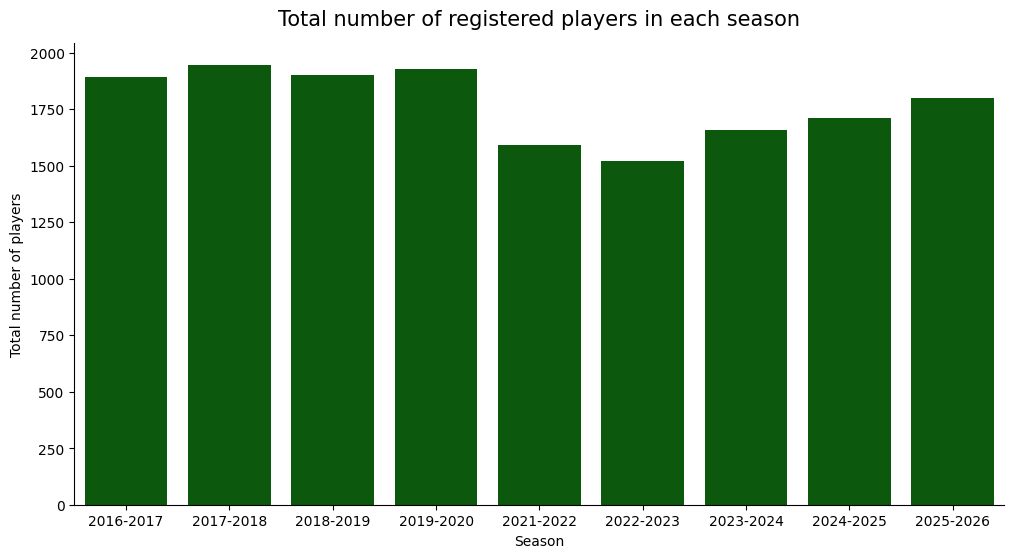

In [250]:
# Create plot to show total number of players in each season
plt.figure(figsize=(12, 6))
sns.barplot(x=total_players.index, y=total_players.values, color='darkgreen')
plt.title('Total number of registered players in each season', y=1.02, size=15)
plt.ylabel('Total number of players')
plt.xlabel('Season')
sns.despine()
plt.show()

### Total number of unique players in each season to have played 5+ games

In [251]:
# Get total number of players in each season who have played at least 5 matches
total_players_5 = final_ranking_df[final_ranking_df["Games Played"] >= 5].groupby("Season")["Name of Player"].nunique()
total_players_5

Season
2016-2017    1597
2017-2018    1593
2018-2019    1584
2019-2020    1080
2021-2022     980
2022-2023    1252
2023-2024    1336
2024-2025    1392
2025-2026      80
Name: Name of Player, dtype: int64

### Show which divisions players played in over the seasons

In [252]:
# Filter big_df to only include players who have played 1+ games
final_ranking_df_filtered = final_ranking_df[final_ranking_df["Games Played"] >= 1]

# Strip "*" and "^ " from Name of Player
final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("*")
final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("^ ")

C:\Users\bpali\AppData\Local\Temp\ipykernel_11468\1539099606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("*")
C:\Users\bpali\AppData\Local\Temp\ipykernel_11468\1539099606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("^ ")


In [253]:
# Drop rows where Division is NaN
final_ranking_df_filtered = final_ranking_df_filtered.dropna(subset=["Division"]).copy()
# Filter out rows where Division contains "M" or "L"
final_ranking_df_filtered = final_ranking_df_filtered[~final_ranking_df_filtered["Division"].str.contains("M|L", na=False)]
# Aggregate the data to ensure no duplicate entries
final_ranking_df_filtered_unique = final_ranking_df_filtered.groupby(["Name of Player", "Season"])["Division"].first().reset_index()
# Create a new dataframe where the seasons are the columns, the rows are the players, and the values are the division the player was in that season
player_divisions = final_ranking_df_filtered_unique.pivot(index="Name of Player", columns="Season", values="Division")

In [254]:
player_divisions

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026
Name of Player,,,,,,,,,
Abel Jon,16A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abel Jonathan,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,12
Achouch Frank,NaN,4,4,4,8,8,8,6,4
Achouch Jules Simon,NaN,NaN,NaN,NaN,19A,12B,12A,4,4
Adams David,10,11,11A,13A,13B,13,11,10,10
...,...,...,...,...,...,...,...,...,...
Zirah Pierre-Alexis Joachim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13A,12
Zou Kevin Tianyi,NaN,NaN,NaN,19A,NaN,NaN,NaN,NaN,NaN
Zou Rongzan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15A


In [255]:
# Add a column to player_divisions that contains the number of seasons each player has played in, then sort by that column
player_divisions["Seasons Played"] = player_divisions.count(axis=1)
player_divisions_sorted = player_divisions.sort_values(by="Seasons Played", ascending=False)

In [256]:
player_divisions_sorted[player_divisions_sorted["Seasons Played"] >= 8].sort_values(by="Name of Player")

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Seasons Played
Name of Player,,,,,,,,,,
Achouch Frank,NaN,4,4,4,8,8,8,6,4,8
Adams David,10,11,11A,13A,13B,13,11,10,10,9
Adjemian Nicolas,13,10,13A,13A,10,10,10,6,7,9
Andersson Greger,8A,13,11A,10,NaN,10,10,7A,7,8
Au Alex Ka Man,6,7B,7,9,8,10,10,7A,7,9
...,...,...,...,...,...,...,...,...,...,...
Young Ki Chun,15,14,13B,13A,15A,12A,13,8A,13A,9
Yu Vincent Hok Yan,2,2,2,2,2,2,2,2,NaN,8
Yuen Amos Wing Keung,15,15B,13A,15,15A,16,16,12,11,9


In [257]:
player_divisions_sorted[player_divisions_sorted.index.str.contains("Yurisa", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Seasons Played
Name of Player,,,,,,,,,,
Yeung Yurisa,7A,NaN,NaN,7,7,4,4,5,5,7


#### Percentage of Players who played at least 5 games

In [258]:
# Calculate the percentage of players in each season who have played at least 5 matches
total_players_5 / total_players * 100

Season
2016-2017    84.497354
2017-2018    81.860226
2018-2019    83.368421
2019-2020    56.103896
2021-2022    61.557789
2022-2023    82.422646
2023-2024    80.627640
2024-2025    81.308411
2025-2026     4.441977
Name: Name of Player, dtype: float64

#### Percentage of Players who played at least 1 game

In [259]:
# Calculate the percentage of players in each season who have played at least 1 match
total_players_1 = final_ranking_df[final_ranking_df["Games Played"] >= 1].groupby("Season")["Name of Player"].nunique()
total_players_1 / total_players * 100

Season
2016-2017    96.613757
2017-2018    95.477903
2018-2019    95.736842
2019-2020    92.467532
2021-2022    91.331658
2022-2023    96.247531
2023-2024    95.473748
2024-2025    97.429907
2025-2026    84.786230
Name: Name of Player, dtype: float64

### HKCC Summary Analysis

In [260]:
big_summary_df[big_summary_df['Played'] == 0]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against


In [261]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKCC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

#### League Winners

In [262]:
hkcc_summary[hkcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against
73,HKCC Wednesday Night Rockers,20,18,2,98,16B,2016-2017,1,NaN,NaN
207,Hong Kong Cricket Club L2B,18,15,3,72,L2,2016-2017,1,NaN,NaN
214,Hong Kong Cricket Club L3,12,9,3,46,L3,2016-2017,1,NaN,NaN
387,Hong Kong Cricket Club 1,18,13,5,68,3,2017-2018,1,NaN,NaN
461,Hong Kong Cricket Club L2,15,13,2,59,L2,2017-2018,1,NaN,NaN
475,Hong Kong Cricket Club M1,16,13,3,65,M1,2017-2018,1,NaN,NaN
523,Hong Kong Cricket Club 6,21,20,1,102,11B,2018-2019,1,NaN,NaN
610,Hong Kong Cricket Club 8,22,19,3,103,18,2018-2019,1,NaN,NaN
719,Hong Kong Cricket Club M1A,20,14,6,65,M1,2018-2019,1,NaN,NaN
748,Hong Kong Cricket Club 10,9,9,0,40,10,2019-2020,1,NaN,NaN


In [263]:
# Show count of Rank equals 1 by Season
hkcc_summary[hkcc_summary["Rank"] == 1].groupby("Season")["Rank"].count()

Season
2016-2017    3
2017-2018    3
2018-2019    3
2019-2020    4
2021-2022    1
2022-2023    1
2023-2024    1
2025-2026    2
Name: Rank, dtype: int64

In [264]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = hkcc_summary["Won"].sum() / hkcc_summary["Played"].sum()
win_percentage


0.5221606648199446

In [265]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkcc_summary = hkcc_summary.copy()
hkcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.517713
2017-2018    0.578402
2018-2019    0.605505
2019-2020    0.592215
2021-2022    0.483460
2022-2023    0.504749
2023-2024    0.427531
2024-2025    0.437162
2025-2026    0.484211
Name: Win Percentage, dtype: float64

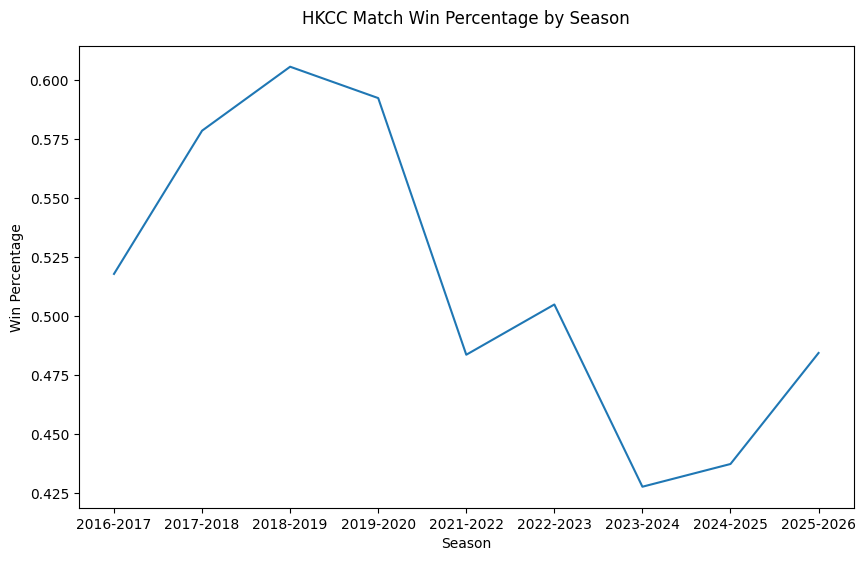

In [266]:
# Draw a line plot of the Win Percentage by Season
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season without confidence interval
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", errorbar=None)
# Set the title of the plot
plt.title("HKCC Match Win Percentage by Season", y=1.03)
# Remove gridlines
plt.grid(False)

### KCC Win Percentage by Season

In [267]:
# Filter big_summary_df for Team column that contains "KCC" or "Kowloon Cricket Club", but not "HKCC"
kcc_summary = big_summary_df[big_summary_df["Team"].str.contains(r"\b(?:Kowloon Cricket Club|KCC)\b", flags=re.IGNORECASE)]

In [268]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = kcc_summary["Won"].sum() / kcc_summary["Played"].sum()
win_percentage

0.6778169014084507

In [269]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
kcc_summary = kcc_summary.copy()
kcc_summary["Win Percentage"] = kcc_summary["Won"] / kcc_summary["Played"]
kcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.625702
2017-2018    0.641083
2018-2019    0.704762
2019-2020    0.681812
2021-2022    0.709041
2022-2023    0.624034
2023-2024    0.683452
2024-2025    0.691839
2025-2026    0.611765
Name: Win Percentage, dtype: float64

### HKFC Win Percentage by Season

In [270]:
# Filter big_summary_df for Team column that contains "HKFC" or "Hong Kong Football Club"
hkfc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKFC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Football Club", case=False)]

In [271]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
hkfc_win_percentage = hkfc_summary["Won"].sum() / hkfc_summary["Played"].sum()
hkfc_win_percentage

0.5568546538285191

In [272]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkfc_summary = hkfc_summary.copy()
hkfc_summary["Win Percentage"] = hkfc_summary["Won"] / hkfc_summary["Played"]
hkfc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.554078
2017-2018    0.540525
2018-2019    0.548704
2019-2020    0.584957
2021-2022    0.509099
2022-2023    0.530581
2023-2024    0.589479
2024-2025    0.565471
2025-2026    0.546667
Name: Win Percentage, dtype: float64

#### USRC Win Percentage by Season

In [273]:
usrc_summary = big_summary_df[big_summary_df["Team"].str.contains("united services", case=False) |
               big_summary_df["Team"].str.contains("usrc", case=False)]

In [274]:
# Get overall win percentage record for usrc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
usrc_win_percentage = usrc_summary["Won"].sum() / usrc_summary["Played"].sum()
usrc_win_percentage

0.5626535626535627

In [275]:
# Show Win Percentage by Season but avoid SettingWithCopyWarning
usrc_summary = usrc_summary.copy()
usrc_summary["Win Percentage"] = usrc_summary["Won"] / usrc_summary["Played"]
usrc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.474890
2017-2018    0.636508
2018-2019    0.649747
2019-2020    0.714646
2021-2022    0.355219
2022-2023    0.518519
2023-2024    0.541667
2024-2025    0.620370
2025-2026    0.302778
Name: Win Percentage, dtype: float64

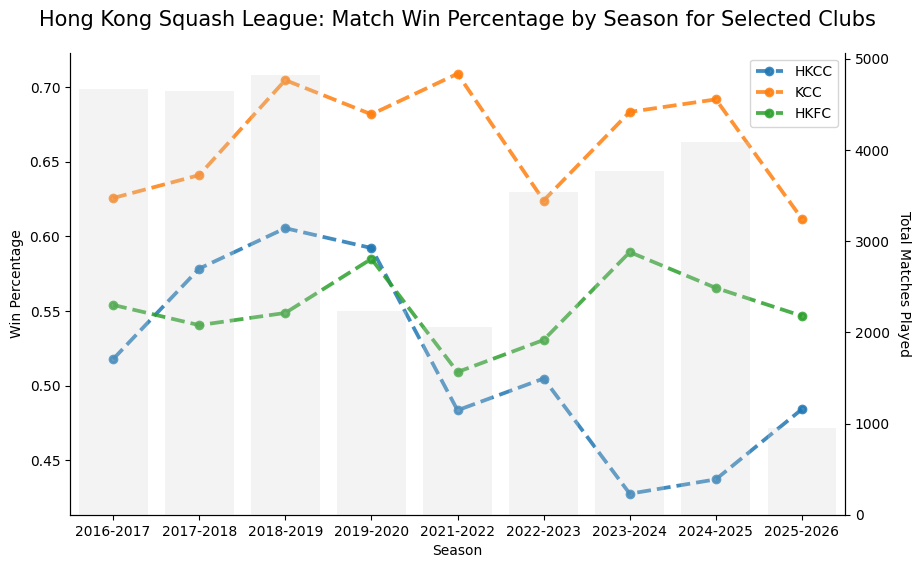

In [276]:
# Add another axis to show total number of matches played in each season
fig, ax = plt.subplots(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season for HKCC with dotted line
sns.pointplot(data=hkcc_summary, x="Season", y="Win Percentage", label="HKCC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Draw a line plot of the Win Percentage by Season for KCC
sns.pointplot(data=kcc_summary, x="Season", y="Win Percentage", label="KCC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Draw a line plot of the Win Percentage by Season for HKFC
sns.pointplot(data=hkfc_summary, x="Season", y="Win Percentage", label="HKFC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Set the title of the plot
plt.title("Hong Kong Squash League: Match Win Percentage by Season for Selected Clubs", y=1.04, size=15)
# Remove gridlines
plt.grid(False)
# Add a legend to the plot
plt.legend()
# Create another y-axis on the right side of the plot
ax2 = ax.twinx()
# Draw a bar plot of the total number of matches played in each season
sns.barplot(data=big_summary_df, x="Season", y="Played", ax=ax2, color="lightgray", alpha=0.25, errorbar=None, estimator=sum)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
# Remove gridlines from the right y-axis
ax2.grid(False)
# remove top spine only
sns.despine(top=True, right=False)


In [277]:
big_summary_df.sort_values(by="Team").to_csv("big_summary_df.csv", index=False)

In [278]:
big_summary_df["Season"].unique()

array(['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2021-2022',
       '2022-2023', '2023-2024', '2024-2025', '2025-2026'], dtype=object)

### Calculate Competitiveness of Divisions

In [279]:
def gini_coefficient(x):
    """
    Calculate the Gini coefficient of a numpy array.
    """
    # Ensure the array is 1D and sorted
    x = np.sort(np.array(x, dtype=np.float64).flatten())
    
    # Handle negative values and zeros
    if np.amin(x) < 0:
        x -= np.amin(x)
    x += 1e-9  # Prevent division by zero
    
    n = x.size
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))
    
    return gini

In [280]:
# Fix this to include 2024-2025 season

In [281]:
gini_results = []

for df in summary_df_list:
    # Extract division and season information
    division = df['Division'].iloc[0]
    season = df['Season'].iloc[0]
    
    # Extract points and handle missing or non-numeric values
    points = df['Points'].replace([np.inf, -np.inf], np.nan).dropna().astype(float).values
    
    # Skip if points array is empty
    if points.size == 0:
        continue
    
    # Calculate the Gini coefficient
    gini = gini_coefficient(points)
    
    # Store the results
    gini_results.append({'Division': division, 'Season': season, 'Gini_Coefficient': gini})


In [282]:
gini_df = pd.DataFrame(gini_results)

In [283]:
gini_df.groupby("Season")["Gini_Coefficient"].mean()

Season
2016-2017    0.240137
2017-2018    0.253069
2018-2019    0.224662
2019-2020    0.231791
2021-2022    0.232191
2022-2023    0.208233
2023-2024    0.222884
Name: Gini_Coefficient, dtype: float64

In [284]:
# Create a new column for gini_df called "League Type". If "M" is found in Division, League Type is "Masters", 
# If "L" is found in Division, League Type is "Ladies". Otherwise, league type is "Main"
gini_df["League Type"] = np.where(gini_df["Division"].str.contains("M", case=False), "Masters",
                                    np.where(gini_df["Division"].str.contains("L", case=False), "Ladies", "Main"))



In [285]:
gini_df.sort_values(by="Gini_Coefficient", ascending=True).head(10)

,Division,Season,Gini_Coefficient,League Type
14,1,2016-2017,0.055652,Main
161,1,2022-2023,0.075472,Main
188,3,2023-2024,0.097890,Main
90,M3,2018-2019,0.108663,Masters
162,2,2022-2023,0.118333,Main
88,M1,2018-2019,0.119369,Masters
109,4,2019-2020,0.126157,Main
60,M3,2017-2018,0.130763,Masters
125,13A,2021-2022,0.138021,Main
27,L3,2016-2017,0.140152,Ladies


In [286]:
# See average Gini Coefficient by League Type
gini_df.groupby("League Type")["Gini_Coefficient"].mean()

League Type
Ladies     0.239536
Main       0.233012
Masters    0.211647
Name: Gini_Coefficient, dtype: float64

### HKCC Total Games Played

In [287]:
# Filter final_ranking_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_ranking = final_ranking_df[final_ranking_df["Team"].str.contains("HKCC", case=False) |
                              final_ranking_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

# Strip "^ " from anyone in Name of Player column while avoiding SettingWithCopyWarning
hkcc_ranking = hkcc_ranking.copy()
hkcc_ranking["Name of Player"] = hkcc_ranking["Name of Player"].str.strip("^ ")

# Group by Name of Player and aggregate Average Points (by mean), Total Game Points (by sum), and Games Played (by sum)
hkcc_ranking_grouped = hkcc_ranking.groupby("Name of Player").agg({"Average Points": "mean",
                                                                  "Total Game Points": "sum",
                                                                  "Games Played": "sum",
                                                                  "Won": "sum",
                                                                  "Lost": "sum",
                                                                  }).reset_index()

# Sort by Games Played
hkcc_ranking_grouped = hkcc_ranking_grouped.sort_values(by="Games Played", ascending=False)

# Create Win Percentage column
hkcc_ranking_grouped["Win Percentage"] = hkcc_ranking_grouped["Won"] / hkcc_ranking_grouped["Games Played"]

In [288]:
hkcc_ranking_grouped.head(20)

,Name of Player,Average Points,Total Game Points,Games Played,Won,Lost,Win Percentage
354,Wong Jessica Po Sze,11.302400,2913,223,72,151,0.322870
15,Bernard Edwin,18.270000,2397,133,66,67,0.496241
64,Chiu Ho Fai,16.249286,2412,125,75,50,0.600000
375,Zimmermann Lorenz,10.655625,1455,122,54,68,0.442623
23,Bradbury Adrian,14.582000,1812,118,68,50,0.576271
0,Achouch Frank,13.908571,1752,117,46,71,0.393162
335,Vera Henry,6.070000,933,116,52,64,0.448276
26,Bruwer Frank,13.635625,1575,114,47,67,0.412281
357,Wong Kirstie Po Yui,13.590714,1629,112,44,68,0.392857
294,Skinn Christopher Andrew,12.024667,1695,110,57,53,0.518182


#### Create dataframe to show games played by season

In [289]:
# Show number of Games Played in each Season for each player, with each Season being a separate column
hkcc_ranking_pivot = hkcc_ranking.pivot_table(index="Name of Player", columns="Season", values="Games Played", aggfunc="sum", fill_value=0)

# Add total column to hkcc_ranking_pivot
hkcc_ranking_pivot["Total"] = hkcc_ranking_pivot.sum(axis=1)

# Sort by Total
hkcc_ranking_pivot = hkcc_ranking_pivot.sort_values(by="Total", ascending=False)

# Save hkcc_ranking_pivot to a csv file
hkcc_ranking_pivot.to_csv("hkcc_ranking_pivot.csv")

In [290]:
hkcc_ranking_grouped[["Name of Player", "Games Played"]].head(25)

,Name of Player,Games Played
354,Wong Jessica Po Sze,223
15,Bernard Edwin,133
64,Chiu Ho Fai,125
375,Zimmermann Lorenz,122
23,Bradbury Adrian,118
0,Achouch Frank,117
335,Vera Henry,116
26,Bruwer Frank,114
357,Wong Kirstie Po Yui,112
294,Skinn Christopher Andrew,110


In [291]:
hkcc_ranking_pivot[hkcc_ranking_pivot.index.str.contains("Neal", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Total
Name of Player,,,,,,,,,,
Soo Neal,0,0,0,9,11,15,3,1,0,39
Soo Tsung Chee Neal,0,0,0,0,0,0,0,0,0,0


In [292]:
hkcc_ranking_pivot[(hkcc_ranking_pivot["Total"] >= 90) & (hkcc_ranking_pivot["2024-2025"] > 0)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Total
Name of Player,,,,,,,,,,
Wong Jessica Po Sze,32,19,29,18,20,35,45,25,0,223
Bernard Edwin,5,13,24,16,8,10,22,25,10,133
Chiu Ho Fai,0,0,0,6,9,35,32,35,8,125
Zimmermann Lorenz,18,14,22,13,15,24,15,1,0,122
Bradbury Adrian,7,9,9,10,17,19,24,18,5,118
Achouch Frank,15,6,14,5,8,18,19,24,8,117
Vera Henry,20,17,14,5,2,18,20,18,2,116
Bruwer Frank,0,0,28,12,10,26,10,21,7,114
Wong Kirstie Po Yui,0,0,25,11,16,23,19,15,3,112


In [293]:
# Filter hkcc_ranking_pivot for players who have played at least 80 matches and have played in the 2024-2025 season and then show only index and "Total"
hkcc_ranking_pivot[(hkcc_ranking_pivot["2016-2017"] >= 10) & (hkcc_ranking_pivot["2017-2018"] >= 10) & (hkcc_ranking_pivot["Total"] < 90)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Total
Name of Player,,,,,,,,,,
Smith Robert,26,22,4,1,5,8,10,9,1,86
Macresy Stephane Marc-Georges,17,14,21,15,16,0,1,0,0,84
Healy Richard,10,13,11,6,8,11,8,10,1,78
Kwok Charmaine,24,16,9,6,7,2,7,5,2,78
Dyus Hugh,17,19,15,5,9,0,0,0,0,65
Windmill Mark,17,16,15,14,0,0,0,0,0,62
Andrews Rod,15,10,17,15,0,0,0,0,0,57
Clark Bryan Henry,14,17,15,9,0,0,0,0,0,55
Hoogendijk Mark,10,12,5,3,5,2,7,9,0,53


In [294]:
# Filter final_ranking_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkfc_ranking = final_ranking_df[final_ranking_df["Team"].str.contains("HKFC", case=False) |
                              final_ranking_df["Team"].str.contains("Hong Kong Football Club", case=False)]

# Strip "^ " from anyone in Name of Player column while avoiding SettingWithCopyWarning
hkfc_ranking = hkfc_ranking.copy()
hkfc_ranking["Name of Player"] = hkfc_ranking["Name of Player"].str.strip("^ ")

# Group by Name of Player and aggregate Average Points (by mean), Total Game Points (by sum), and Games Played (by sum)
hkfc_ranking_grouped = hkfc_ranking.groupby("Name of Player").agg({"Average Points": "mean",
                                                                  "Total Game Points": "sum",
                                                                  "Games Played": "sum",
                                                                  "Won": "sum",
                                                                  "Lost": "sum",
                                                                  }).reset_index()

# Sort by Games Played
hkfc_ranking_grouped = hkfc_ranking_grouped.sort_values(by="Games Played", ascending=False)

# Create Win Percentage column
hkfc_ranking_grouped["Win Percentage"] = hkfc_ranking_grouped["Won"] / hkfc_ranking_grouped["Games Played"]

In [295]:
hkfc_ranking_grouped[hkfc_ranking_grouped["Games Played"] >= 100]

,Name of Player,Average Points,Total Game Points,Games Played,Won,Lost,Win Percentage
324,Murray David,12.532778,2601,202,95,107,0.470297
481,Ward Andrew,16.996875,3258,186,130,56,0.698925
130,Gates Stuart,12.878571,2991,180,108,72,0.600000
428,Sung Iris,8.890000,1740,176,51,125,0.289773
519,Yeung Yurisa,15.959048,3042,171,125,46,0.730994
447,Tanner Julian,16.019048,3090,170,98,72,0.576471
321,Mulchand Rajesh,15.904118,2868,168,114,54,0.678571
155,Ho Eric Chu Him,16.438947,2628,162,96,66,0.592593
243,Lee Ka Man Carmen,14.215000,2085,143,95,48,0.664336
501,Wong Javy Ki Ling,14.694211,2445,141,80,61,0.567376


In [296]:
hkcc_summary["Team"].value_counts()

Team
Hong Kong Cricket Club M3               9
Hong Kong Cricket Club Rockettes        8
Hong Kong Cricket Club 4                8
Hong Kong Cricket Club 6                8
Hong Kong Cricket Club 2                8
Hong Kong Cricket Club L1               7
Hong Kong Cricket Club M1A              7
Hong Kong Cricket Club M1B              7
Hong Kong Cricket Club 5                7
Hong Kong Cricket Club 3                7
Hong Kong Cricket Club 1                7
Hong Kong Cricket Club L2B              6
Hong Kong Cricket Club L2A              6
Hong Kong Cricket Club 8                6
Hong Kong Cricket Club M4               5
Hong Kong Cricket Club M2               3
HKCC Tuesday Night Rockers              3
Hong Kong Cricket Club L2               3
Hong Kong Cricket Club L3               3
Hong Kong Cricket Club Young Masters    2
Hong Kong Cricket Club Rockers          2
Hong Kong Cricket Club L4               2
Hong Kong Cricket Club 7                2
Hong Kong Cricket Club M1    

In [297]:
hkcc_summary.to_csv("hkcc_summary.csv", index=False)

In [298]:
# Show which divisions were played in each season in hkcc_summary
hkcc_summary.groupby("Season")["Division"].unique()

Season
2016-2017    [11, 12B, 16B, 18A, 19, 4, 6, 8A, 9, L2, L3, M...
2017-2018    [11, 12A, 15A, 18, 19, 3, 4, 6, 8, L2, L3, M1,...
2018-2019    [10, 11B, 12A, 15, 18, 19B, 1, 4, 5, 8, L1, L2...
2019-2020    [10, 12A, 15, 17A, 19B, 2, 4, 6, 8, L1, L2, L3...
2021-2022    [10, 11, 12A, 15A, 19A, 2, 6, 8, L1, L2, L3, M...
2022-2023    [11, 12A, 15B, 19, 2, 5, 8, L1, L2, L3, M1, M3...
2023-2024    [11, 12A, 15, 18, 1, 2, 8, L1, L2, L3, M1, M2,...
2024-2025    [Premier Main, 2, 4, 6, 7A, 7B, 11, 15A, Premi...
2025-2026    [Premier Main, 2, 4, 6, 7, 10, 15B, Premier Ma...
Name: Division, dtype: object

In [299]:
hkcc_ranking_pivot[hkcc_ranking_pivot.index.str.contains("barry", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Total
Name of Player,,,,,,,,,,
Caveney Barry John,0,0,0,0,1,26,30,23,6,86
Yeung Barry Chiu Kwan,7,7,7,0,1,0,0,0,0,22
Adcock Barry,7,5,0,0,0,0,0,0,0,12


In [300]:
big_summary_df.head()

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against
0,Hong Kong Football Club 10A,21,18,3,94,10,2016-2017,1,NaN,NaN
1,i-MASK Advance Squash Club 7,21,18,3,91,10,2016-2017,2,NaN,NaN
2,Perrier KCC 7,21,15,6,83,10,2016-2017,3,NaN,NaN
3,Hong Kong Football Club 10B,21,13,8,83,10,2016-2017,4,NaN,NaN
4,Royal Hong Kong Yacht Club 10,21,7,14,46,10,2016-2017,5,NaN,NaN


In [301]:
all_previous_teams_df

,Team Name,Home,Convenor,Email,Division,Season
0,Banbil,HK Squash Centre (HKSC),Christopher Barrett,thekristophebarrett@gmail.com,10,2016-2017
1,i-MASK Advance Squash Club 7,Cornwall Street (CSPSC),Tat Chi Chow,chowsir30@gmail.com,10,2016-2017
2,Hong Kong Football Club 10A,Hong Kong Football Club (HKFC),Vinod Harjani,vinod@sashaint.com,10,2016-2017
3,Hong Kong Football Club 10B,Hong Kong Football Club (HKFC),Arthur Maloy,arthur@ascentca.com,10,2016-2017
4,Perrier KCC 7,Kowloon Cricket Club (KCC),Dhiraj Kundamal,dhk@kundamalgroup.com,10,2016-2017
...,...,...,...,...,...,...
1796,Hong Kong Football Club L4,Hong Kong Football Club,Jigyasa Dua,jigyasadua88@gmail.com,L4,2024-2025
1797,Hong Kong Football Club JSA,Hong Kong Football Club,Jason Che Man Lam,j.lambo@gmail.com,L4,2024-2025
1798,i-Mask Advance Squash Club L4,Cornwall Street Squash Centre,Tat Chi Chow,chowsir30@gmail.com,L4,2024-2025
1799,JESSICA L4,HK Squash Centre,Chin Pik Ho,pikpik@gmail.com,L4,2024-2025


In [302]:
# Find row in all_previous_teams_df where Home contains "HKCC" or "Hong Kong Cricket Club" but Team Name does not contain "HKCC" or "Hong Kong Cricket Club"
hkcc_teams = all_previous_teams_df[all_previous_teams_df["Home"].str.contains("HKCC", case=False) |
                                    all_previous_teams_df["Home"].str.contains("Hong Kong Cricket Club", case=False)
]

hkcc_teams.to_csv("hkcc_teams.csv", index=False)

In [303]:
hkcc_ranking_pivot.head(20)

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,Total
Name of Player,,,,,,,,,,
Wong Jessica Po Sze,32,19,29,18,20,35,45,25,0,223
Bernard Edwin,5,13,24,16,8,10,22,25,10,133
Chiu Ho Fai,0,0,0,6,9,35,32,35,8,125
Zimmermann Lorenz,18,14,22,13,15,24,15,1,0,122
Bradbury Adrian,7,9,9,10,17,19,24,18,5,118
Achouch Frank,15,6,14,5,8,18,19,24,8,117
Vera Henry,20,17,14,5,2,18,20,18,2,116
Bruwer Frank,0,0,28,12,10,26,10,21,7,114
Wong Kirstie Po Yui,0,0,25,11,16,23,19,15,3,112


In [304]:
hkcc_ranking_pivot.to_csv("hkcc_games_played_by_season.csv")